In [38]:
print("Name: Pooja P Rawool")
print("ERP ID: 1132200081")

Name: Pooja P Rawool
ERP ID: 1132200081


In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split

In [2]:
%cd D:\MSC\Trimester3\ML2\Datasets

D:\MSC\Trimester3\ML2\Datasets


# Fish_Modified

In [3]:
data=pd.read_csv("Fish_Modified.csv")

In [4]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
3,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
4,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555


In [5]:
data["Length"]=data["Length1"]+data["Length2"]+data["Length3"]

In [6]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,Length
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,78.6
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,81.5
2,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,81.5
3,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,81.5
4,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,88.8


In [7]:
data.drop(["Length1","Length2","Length3"],axis=1,inplace=True)

In [8]:
data.head()

,Species,Weight,Height,Width,Length
0,Bream,242.0,11.5200,4.0200,78.6
1,Bream,290.0,12.4800,4.3056,81.5
2,Bream,290.0,12.4800,4.3056,81.5
3,Bream,340.0,12.3778,4.6961,81.5
4,Bream,363.0,12.7300,4.4555,88.8


In [9]:
data.describe()

,Weight,Height,Width,Length
count,163.000000,163.000000,163.000000,163.000000
mean,396.941893,9.006893,4.502990,86.065905
std,357.010485,4.352748,1.758922,32.111258
min,0.000000,1.738800,1.047600,24.700000
25%,120.000000,5.926950,3.525000,64.486792
50%,273.000000,7.786000,4.335000,81.500000
75%,635.500000,12.379300,5.602222,107.650000
max,1650.000000,20.000000,12.000000,190.400000


In [10]:
data1=data.copy()
data_copy=data.copy()

<Figure size 432x288 with 0 Axes>

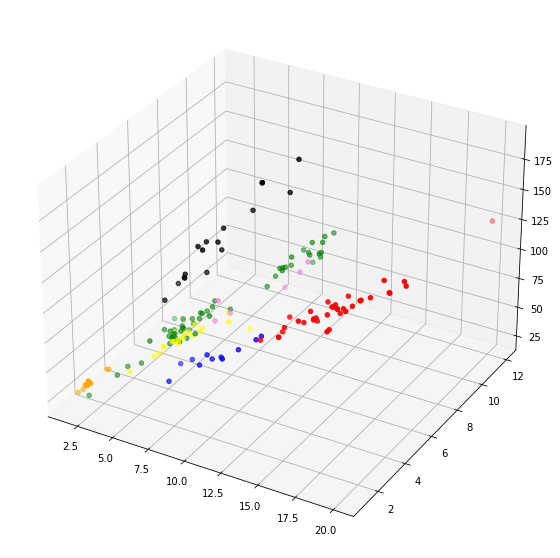

In [11]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
plt.figure(figsize=(20,10))
ax=plt.axes(projection="3d")
x=data["Height"]
y=data["Width"]
z=data["Length"]
colors={"Bream":'red',"Parkki":'blue',"Perch":'green',"Pike":'black',"Roach":'yellow',"Smelt":'orange',"Whitefish":'violet'}
ax.scatter3D(x,y,z,c=data["Species"].apply(lambda x: colors[x]))

# IQR based outlier removal using Box-Whisker Plot

{'whiskers': [<matplotlib.lines.Line2D at 0x17d60679640>,
 'caps': [<matplotlib.lines.Line2D at 0x17d60679d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x17d606792e0>],
 'medians': [<matplotlib.lines.Line2D at 0x17d60686400>],
 'fliers': [<matplotlib.lines.Line2D at 0x17d60686760>],
 'means': []}

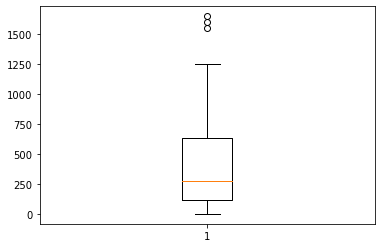

In [12]:
plt.boxplot(data.iloc[:,1:2])

{'whiskers': [<matplotlib.lines.Line2D at 0x17d606e6310>,
 'caps': [<matplotlib.lines.Line2D at 0x17d606e69d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17d606d8f40>,
 'medians': [<matplotlib.lines.Line2D at 0x17d606f10d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x17d606f1430>,
 'means': []}

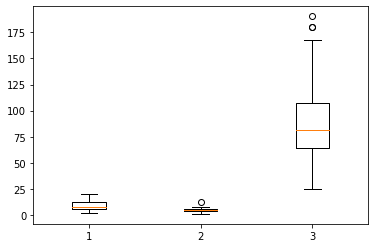

In [13]:
plt.boxplot(data.iloc[:,2:5])

# We can extract various percentile values for a given column

In [14]:
data["Length"].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
data["Width"].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
data["Height"].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0     1.738800
0.1     3.587200
0.2     5.637480
0.3     6.283040
0.4     6.951060
0.5     7.786000
0.6     9.627280
0.7    11.416160
0.8    12.679600
0.9    15.427593
1.0    20.000000
Name: Height, dtype: float64

# We will use pandas boxplot function on dataframe

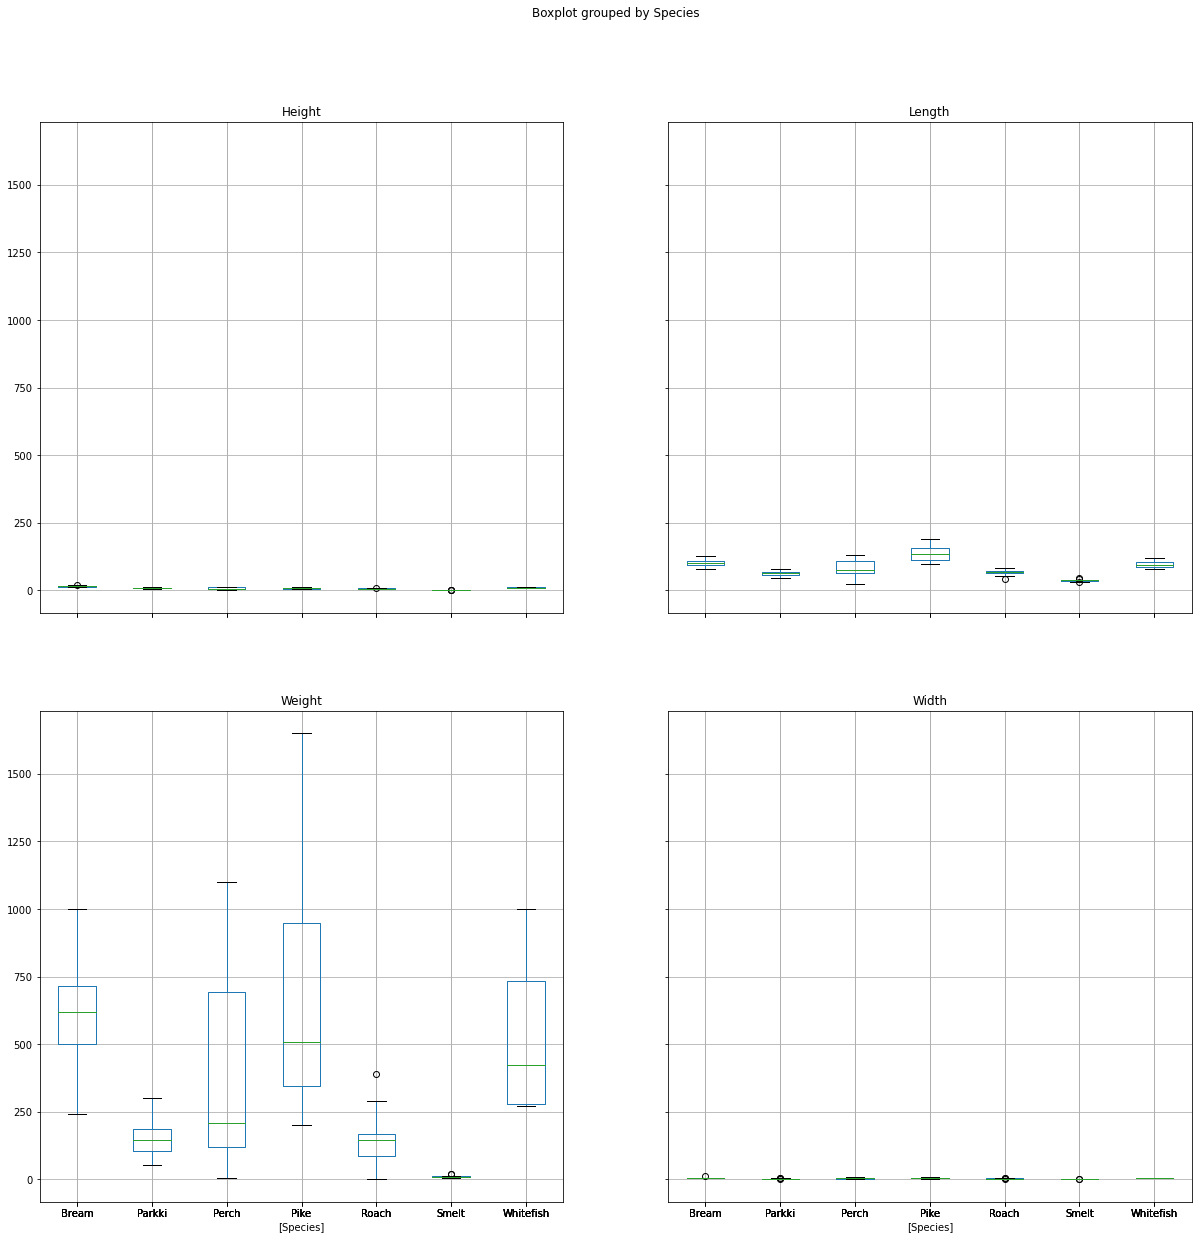

In [15]:
retval=data.boxplot(by="Species",figsize=(20,20))

Looking at the above plot we may consider removal of outliers at species attribute level.

# Removing outliers at species attribute level

In [16]:
def outliers(group,col,data):
    q1=data[data["Species"]==group][col].quantile(q=0.25)
    q3=data[data["Species"]==group][col].quantile(q=0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    outliers=data[(data["Species"]==group)&((data[col]>upper) | (data[col]<lower))]
    return list(outliers.index.values)    

In [17]:
Species= list(data["Species"].unique())
columns= list(data.drop(["Species"],axis=1).columns)
out_index=[]
for col in columns:
    for group in Species:
        [out_index.append(i) for i in outliers(group,col,data)]

In [18]:
len(out_index)

21

In [19]:
out_index

[57,
 161,
 162,
 31,
 57,
 148,
 161,
 162,
 31,
 37,
 56,
 57,
 64,
 73,
 74,
 161,
 162,
 37,
 148,
 161,
 162]

## For getting the unique index

In [20]:
def get_unique_out_index(out_index):
    list_of_unique_out_index = []
    unique_outindex = set(out_index)
    for index in unique_outindex:
        list_of_unique_out_index.append(index)
    return list_of_unique_out_index
unique_Outlier_index=get_unique_out_index(out_index)
print(unique_Outlier_index)
print(len(unique_Outlier_index))

[64, 161, 162, 37, 73, 74, 148, 56, 57, 31]
10


## Assigning 1 for inliers and 0 for outliers

In [21]:
data["isinlier"]=1
data["isinlier"].iloc[[out_index]]=0

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
D:\Anaconda\lib\site-packages\pandas\core\internals\blocks.py:891: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  values[indexer] = value


In [22]:
data.head()

,Species,Weight,Height,Width,Length,isinlier
0,Bream,242.0,11.5200,4.0200,78.6,1
1,Bream,290.0,12.4800,4.3056,81.5,1
2,Bream,290.0,12.4800,4.3056,81.5,1
3,Bream,340.0,12.3778,4.6961,81.5,1
4,Bream,363.0,12.7300,4.4555,88.8,1


In [23]:
data["isinlier"].value_counts()

1    153
0     10
Name: isinlier, dtype: int64

<Figure size 432x288 with 0 Axes>

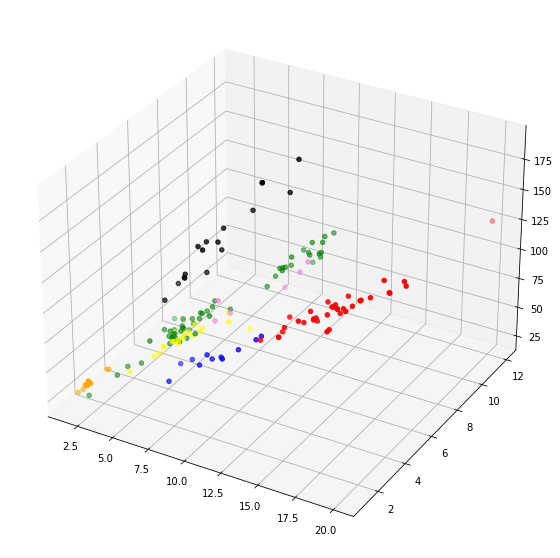

In [24]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
plt.figure(figsize=(20,10))
ax=plt.axes(projection="3d")
x=data["Height"]
y=data["Width"]
z=data["Length"]
colors={"Bream":'red',"Parkki":'blue',"Perch":'green',"Pike":'black',"Roach":'yellow',"Smelt":'orange',"Whitefish":'violet'}
ax.scatter3D(x,y,z,c=data["Species"].apply(lambda x: colors[x]))

<Figure size 432x288 with 0 Axes>

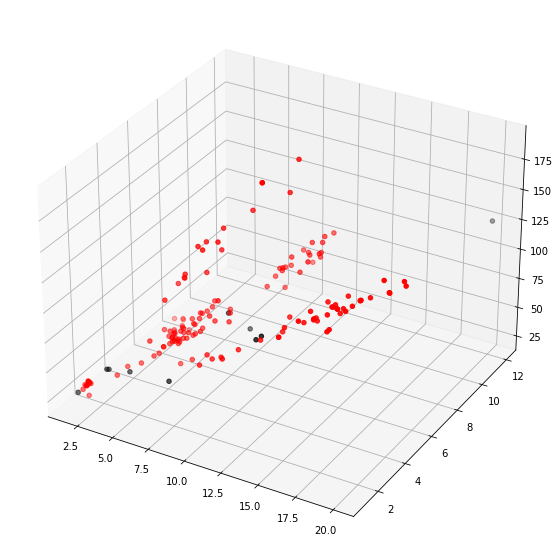

In [25]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
plt.figure(figsize=(20,10))
ax=plt.axes(projection="3d")
x=data["Height"]
y=data["Width"]
z=data["Length"]
colors={1:'red',0:'black'}
ax.scatter3D(x,y,z,c=data["isinlier"].apply(lambda x: colors[x]))

In [26]:
data["Species"].value_counts()

Perch        56
Bream        37
Roach        21
Pike         17
Smelt        15
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [27]:
data=data.drop(index=out_index)

In [28]:
data["Species"].value_counts()

Perch        56
Bream        36
Roach        18
Pike         17
Smelt        12
Parkki        8
Whitefish     6
Name: Species, dtype: int64

Removal of outliers at species attribute level can lead to better predictions.

# Removing outliers at species attribute level

In [15]:
data1.head()

,Species,Weight,Height,Width,Length
0,Bream,242.0,11.5200,4.0200,78.6
1,Bream,290.0,12.4800,4.3056,81.5
2,Bream,290.0,12.4800,4.3056,81.5
3,Bream,340.0,12.3778,4.6961,81.5
4,Bream,363.0,12.7300,4.4555,88.8


In [16]:
def outliers(df,col):
    q1=df[col].quantile(0.50)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-(1.5*iqr)
    upper_bound=q3+(1.5*iqr)
    outliers=data1[((data1[col]>upper_bound) | (data1[col]<lower_bound))]
    return list(outliers.index.values)

In [17]:
columns= list(data1.drop(["Species"],axis=1).columns)
out_index=[]
for col in columns:
    [out_index.append(i) for i in outliers(data1,col)]

In [18]:
len(out_index)

49

In [19]:
out_index

[144,
 145,
 146,
 147,
 31,
 31,
 37,
 64,
 75,
 76,
 77,
 114,
 129,
 130,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 75,
 76,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160]

## For getting the unique index

In [20]:
def get_unique_out_index(out_index):
    list_of_unique_out_index = []
    unique_outindex = set(out_index)
    for index in unique_outindex:
        list_of_unique_out_index.append(index)
    return list_of_unique_out_index
unique_Outlier_index=get_unique_out_index(out_index)
print(unique_Outlier_index)
print(len(unique_Outlier_index))

[129, 130, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 31, 159, 160, 161, 162, 37, 64, 75, 76, 77, 114]
29


## Assigning 1 for inliers and 0 for outliers

In [21]:
data1["isinlier"]=1
data1["isinlier"].iloc[[out_index]]=0

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
D:\Anaconda\lib\site-packages\pandas\core\internals\blocks.py:891: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  values[indexer] = value


In [22]:
data1.head()

,Species,Weight,Height,Width,Length,isinlier
0,Bream,242.0,11.5200,4.0200,78.6,1
1,Bream,290.0,12.4800,4.3056,81.5,1
2,Bream,290.0,12.4800,4.3056,81.5,1
3,Bream,340.0,12.3778,4.6961,81.5,1
4,Bream,363.0,12.7300,4.4555,88.8,1


In [23]:
data1["isinlier"].value_counts()

1    134
0     29
Name: isinlier, dtype: int64

<Figure size 432x288 with 0 Axes>

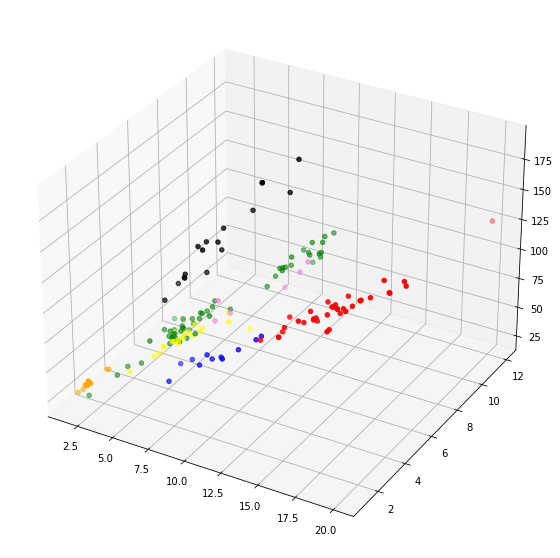

In [13]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
plt.figure(figsize=(20,10))
ax=plt.axes(projection="3d")
x=data["Height"]
y=data["Width"]
z=data["Length"]
colors={"Bream":'red',"Parkki":'blue',"Perch":'green',"Pike":'black',"Roach":'yellow',"Smelt":'orange',"Whitefish":'violet'}
ax.scatter3D(x,y,z,c=data["Species"].apply(lambda x: colors[x]))

<Figure size 432x288 with 0 Axes>

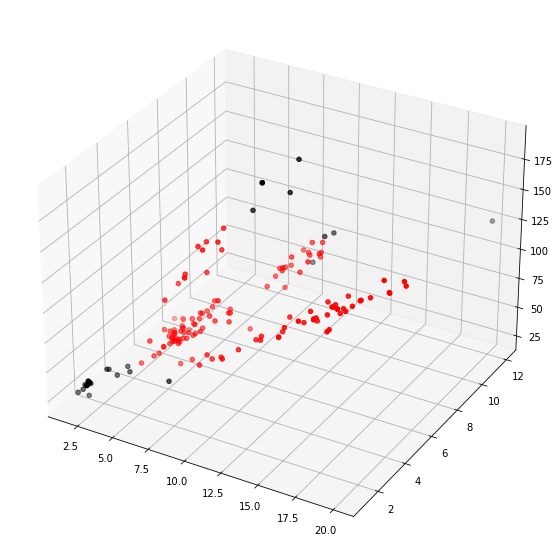

In [24]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
plt.figure(figsize=(20,10))
ax=plt.axes(projection="3d")
x=data1["Height"]
y=data1["Width"]
z=data1["Length"]
colors={1:'red',0:'black'}
ax.scatter3D(x,y,z,c=data1["isinlier"].apply(lambda x: colors[x]))

In [26]:
data["Species"].value_counts()

Perch        56
Bream        37
Roach        21
Pike         17
Smelt        15
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [27]:
data1=data1.drop(index=out_index)

In [28]:
data1["Species"].value_counts()

Perch        50
Bream        36
Roach        20
Pike         12
Parkki       10
Whitefish     6
Name: Species, dtype: int64

In removal of outliers at attribute level one entire specie i.e. Smelt is being removed and it can lead to wrong predictions

# EllipticEnvelope

In [29]:
from sklearn.covariance import EllipticEnvelope
y=data_copy["Weight"]
x=data_copy.drop(["Weight","Species"],axis=1)
cov = EllipticEnvelope(random_state=0).fit(x)

In [30]:
# predict returns 1 for an inlier and -1 for an outlier
data_copy["ellyptic_evelope_labels"]=cov.predict(x)

In [31]:
data_copy["ellyptic_evelope_labels"].value_counts()

 1    146
-1     17
Name: ellyptic_evelope_labels, dtype: int64

In [32]:
data_copy.head()

,Species,Weight,Height,Width,Length,ellyptic_evelope_labels
0,Bream,242.0,11.5200,4.0200,78.6,1
1,Bream,290.0,12.4800,4.3056,81.5,1
2,Bream,290.0,12.4800,4.3056,81.5,1
3,Bream,340.0,12.3778,4.6961,81.5,1
4,Bream,363.0,12.7300,4.4555,88.8,1


<Figure size 432x288 with 0 Axes>

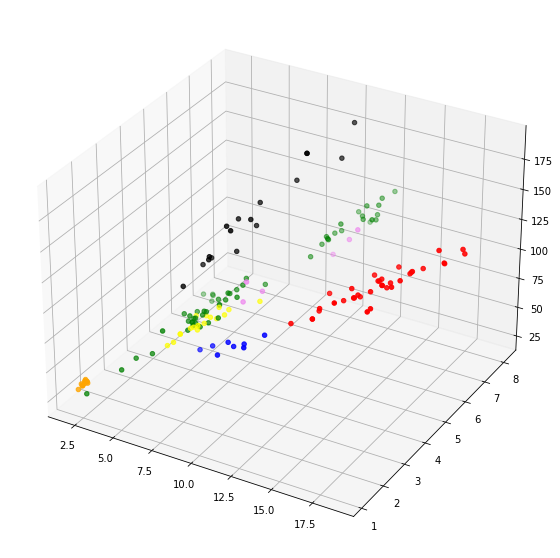

In [33]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
plt.figure(figsize=(20,10))
ax=plt.axes(projection="3d")
x=data["Height"]
y=data["Width"]
z=data["Length"]
colors={"Bream":'red',"Parkki":'blue',"Perch":'green',"Pike":'black',"Roach":'yellow',"Smelt":'orange',"Whitefish":'violet'}
ax.scatter3D(x,y,z,c=data["Species"].apply(lambda x: colors[x]))

<Figure size 432x288 with 0 Axes>

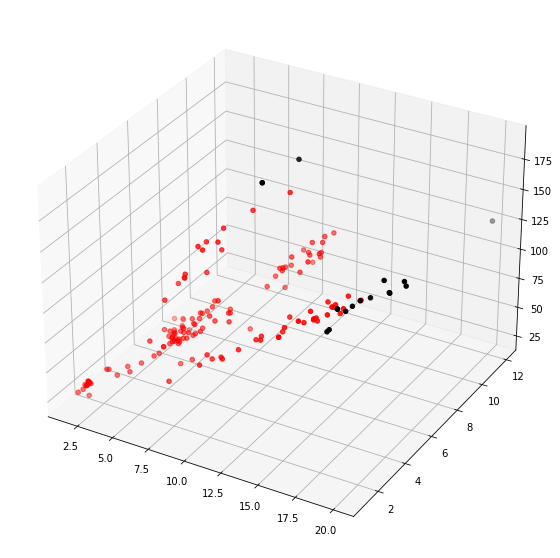

In [34]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
plt.figure(figsize=(20,10))
ax=plt.axes(projection="3d")
x=data_copy["Height"]
y=data_copy["Width"]
z=data_copy["Length"]
colors={1:'red',-1:'black'}
ax.scatter3D(x,y,z,c=data_copy["ellyptic_evelope_labels"].apply(lambda x: colors[x]))

For this dataset we can conclude that removing outliers at species attribute level can lead to better predictions than removing outliers at the column level as it can lead to removal of the entire specie.